# Figure 3C: Comparing West vs. East

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import cv2

# for converting cielab to LCh
from colormath.color_objects import LabColor, LCHabColor
from colormath.color_conversions import convert_color

In [2]:
color_df = pd.read_csv('../datasets/1-clusters/cluster1.csv')
color_df

,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude
0,0,#d4b4de,"(212, 180, 222)","(0.7936507936507936, 0.38888888888888895, 0.78...","(197, 147, 111)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171
1,2,#cdb2cb,"(205, 178, 203)","(0.8456790123456791, 0.21259842519685052, 0.75...","(193, 142, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076
2,4,#bba6d7,"(187, 166, 215)","(0.738095238095238, 0.3798449612403101, 0.7470...","(182, 145, 106)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565
3,7,#9984ae,"(153, 132, 174)","(0.75, 0.2058823529411765, 0.6000000000000001)","(149, 144, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643
4,9,#ba9edb,"(186, 158, 219)","(0.7431693989071038, 0.4586466165413533, 0.739...","(177, 150, 101)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035
...,...,...,...,...,...,...,...,...,...
20623,41059,#9f8fc0,"(159, 143, 192)","(0.7210884353741497, 0.27999999999999997, 0.65...","(159, 144, 105)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552
20624,41060,#b47eb0,"(180, 126, 176)","(0.845679012345679, 0.2647058823529413, 0.6000...","(152, 157, 110)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277
20625,41061,#ae95c8,"(174, 149, 200)","(0.7483660130718954, 0.31677018633540366, 0.68...","(167, 147, 105)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752
20626,41063,#c8b9b1,"(200, 185, 177)","(0.057971014492753624, 0.17293233082706772, 0....","(194, 132, 134)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498


In [3]:
color_df_reduced = (
    color_df.groupby("gbifID", sort=False, group_keys=False)
    .apply(lambda x: x.sample(1))
    .reset_index(drop=True)
)
color_df_reduced

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_97776/411184798.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(1))


,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude
0,0,#d4b4de,"(212, 180, 222)","(0.7936507936507936, 0.38888888888888895, 0.78...","(197, 147, 111)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171
1,2,#cdb2cb,"(205, 178, 203)","(0.8456790123456791, 0.21259842519685052, 0.75...","(193, 142, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076
2,4,#bba6d7,"(187, 166, 215)","(0.738095238095238, 0.3798449612403101, 0.7470...","(182, 145, 106)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565
3,7,#9984ae,"(153, 132, 174)","(0.75, 0.2058823529411765, 0.6000000000000001)","(149, 144, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643
4,9,#ba9edb,"(186, 158, 219)","(0.7431693989071038, 0.4586466165413533, 0.739...","(177, 150, 101)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035
...,...,...,...,...,...,...,...,...,...
16582,41059,#9f8fc0,"(159, 143, 192)","(0.7210884353741497, 0.27999999999999997, 0.65...","(159, 144, 105)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552
16583,41060,#b47eb0,"(180, 126, 176)","(0.845679012345679, 0.2647058823529413, 0.6000...","(152, 157, 110)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277
16584,41061,#ae95c8,"(174, 149, 200)","(0.7483660130718954, 0.31677018633540366, 0.68...","(167, 147, 105)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752
16585,41063,#c8b9b1,"(200, 185, 177)","(0.057971014492753624, 0.17293233082706772, 0....","(194, 132, 134)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498


## calculate darkness from cielab (newer version)

In [4]:
L = [(int(i.strip('()').split(', ')[0])) for i in color_df_reduced.lab]
L = (np.array(L) / 255.0) * 100.0  
color_df_reduced['L'] = L
a = [(int(i.strip('()').split(', ')[1])) for i in color_df_reduced.lab]
a = np.array(a) - 128.0  
color_df_reduced['a'] = a
b = [(int(i.strip('()').split(', ')[2])) for i in color_df_reduced.lab]
b = np.array(b) - 128.0
color_df_reduced['b'] = b

### get LCh values as well

In [5]:
lab_vals = np.array(color_df_reduced[['L','a','b']])

lch_arr = np.empty_like(lab_vals)
for i, (L_, a_, b_) in enumerate(lab_vals):
    # had to think carefully here -- these look like the correct defaults
    # rather than d50 illuminant because of I used opencv at its default
    lab = LabColor(L_, a_, b_, observer='2', illuminant='d65') 
    lch = convert_color(lab, LCHabColor)
    lch_arr[i] = lch.get_value_tuple()

In [6]:
color_df_reduced['lch_l'] = lch_arr[:,0]
color_df_reduced['lch_c'] = lch_arr[:,1]
color_df_reduced['lch_h'] = lch_arr[:,2]

### add "region" column

In [7]:
# set region split longitude
focal_lon = -100 
# make a "region" column based on longitude
color_df_reduced['region'] = color_df_reduced['longitude'].apply(lambda x: 'East' if x > focal_lon else 'West')
color_df_reduced

,image_idx,hex,rgb,hsl,lab,gbifID,identifier,latitude,longitude,L,a,b,lch_l,lch_c,lch_h,region
0,0,#d4b4de,"(212, 180, 222)","(0.7936507936507936, 0.38888888888888895, 0.78...","(197, 147, 111)",923911394,https://inaturalist-open-data.s3.amazonaws.com...,48.826305,-102.092171,77.254902,19.0,-17.0,77.254902,25.495098,318.179830,West
1,2,#cdb2cb,"(205, 178, 203)","(0.8456790123456791, 0.21259842519685052, 0.75...","(193, 142, 119)",923910407,https://inaturalist-open-data.s3.amazonaws.com...,43.613086,-73.057076,75.686275,14.0,-9.0,75.686275,16.643317,327.264774,East
2,4,#bba6d7,"(187, 166, 215)","(0.738095238095238, 0.3798449612403101, 0.7470...","(182, 145, 106)",899970365,https://inaturalist-open-data.s3.amazonaws.com...,43.066871,-87.890565,71.372549,17.0,-22.0,71.372549,27.802878,307.694240,East
3,7,#9984ae,"(153, 132, 174)","(0.75, 0.2058823529411765, 0.6000000000000001)","(149, 144, 109)",891778924,https://inaturalist-open-data.s3.amazonaws.com...,42.140556,-87.831643,58.431373,16.0,-19.0,58.431373,24.839485,310.100908,East
4,9,#ba9edb,"(186, 158, 219)","(0.7431693989071038, 0.4586466165413533, 0.739...","(177, 150, 101)",891760719,https://inaturalist-open-data.s3.amazonaws.com...,38.679240,-97.990035,69.411765,22.0,-27.0,69.411765,34.828150,309.173658,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,41059,#9f8fc0,"(159, 143, 192)","(0.7210884353741497, 0.27999999999999997, 0.65...","(159, 144, 105)",1024218211,https://inaturalist-open-data.s3.amazonaws.com...,41.569419,-88.150552,62.352941,16.0,-23.0,62.352941,28.017851,304.824489,East
16583,41060,#b47eb0,"(180, 126, 176)","(0.845679012345679, 0.2647058823529413, 0.6000...","(152, 157, 110)",1024202810,https://inaturalist-open-data.s3.amazonaws.com...,45.057871,-87.168277,59.607843,29.0,-18.0,59.607843,34.132096,328.172553,East
16584,41061,#ae95c8,"(174, 149, 200)","(0.7483660130718954, 0.31677018633540366, 0.68...","(167, 147, 105)",1024200169,https://inaturalist-open-data.s3.amazonaws.com...,42.921738,-88.026752,65.490196,19.0,-23.0,65.490196,29.832868,309.559668,East
16585,41063,#c8b9b1,"(200, 185, 177)","(0.057971014492753624, 0.17293233082706772, 0....","(194, 132, 134)",1024198670,https://inaturalist-open-data.s3.amazonaws.com...,40.791723,-80.492498,76.078431,4.0,6.0,76.078431,7.211103,56.309932,East


# compare values in different regions

#### first get median color for each region

In [8]:
# conversion functions (from notebook 5)
def rgb_to_hex(rgb):
    # rgb should be a tuple like (R, G, B)
    return '#{:02x}{:02x}{:02x}'.format(*rgb)
def lab_to_rgb(lab):
    """convert (L,a,b) in OpenCV's Lab to (r,g,b) in [0,255]"""
    arr = np.array([[lab]], dtype=np.uint8)
    rgb = cv2.cvtColor(arr, cv2.COLOR_LAB2RGB)[0][0]
    return tuple(int(x) for x in rgb)

#### west median

In [9]:
west = list(color_df_reduced[color_df_reduced.region.eq('West')].lab)
west = [i.strip('()').split(', ') for i in west]
west = [[float(q) for q in i] for i in west]

In [10]:
median_lab = np.median(west,axis=0)
median_lab

array([164., 160., 102.])

In [11]:
west_median_color = rgb_to_hex(lab_to_rgb(median_lab))
west_median_color

'#bf89cb'

#### east median

In [12]:
east = list(color_df_reduced[color_df_reduced.region.eq('East')].lab)
east = [i.strip('()').split(', ') for i in east]
east = [[float(q) for q in i] for i in east]

In [13]:
median_lab = np.median(east,axis=0)
median_lab

array([190., 145., 113.])

In [14]:
east_median_color = rgb_to_hex(lab_to_rgb(median_lab))
east_median_color

'#caaed3'

# Now make box-and-whisker plots

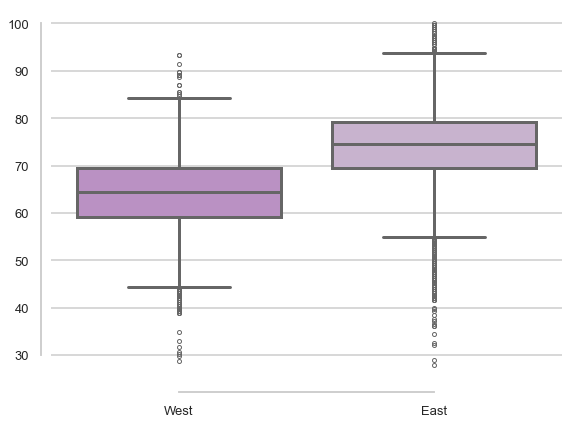

t-statistic: 53.856
p-value: 0.00000


In [15]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='L',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure_puzzling/box_whisker_L.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['L']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['L']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# what about differences in a and b?

# first, *a* (green-red):

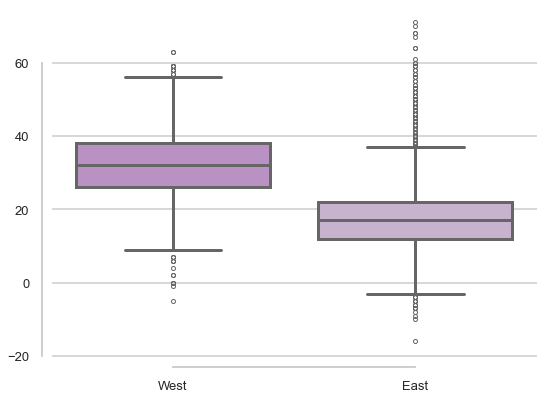

t-statistic: -71.315
p-value: 0.00000


In [16]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='a',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure_puzzling/box_whisker_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['a']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['a']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# then, *b* (blue-yellow):

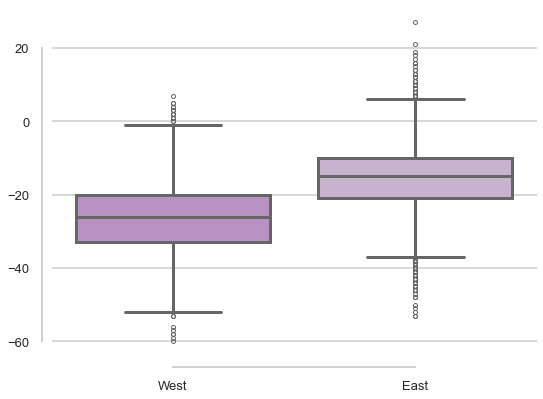

t-statistic: 51.440
p-value: 0.00000


In [17]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='b',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure_puzzling/box_whisker_b.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['b']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['b']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# LCh values now

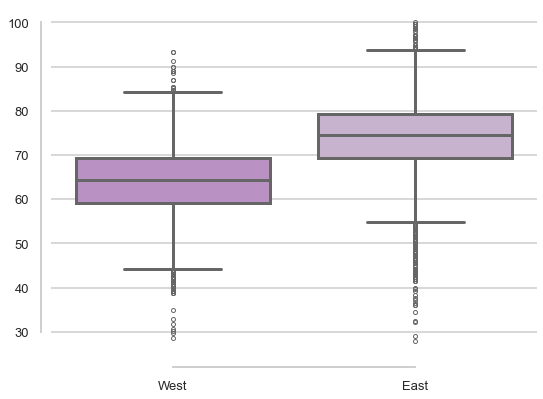

t-statistic: 53.856
p-value: 0.00000


In [18]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='lch_l',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure_puzzling/box_whisker_lch_l.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['L']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['L']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# c (chroma)

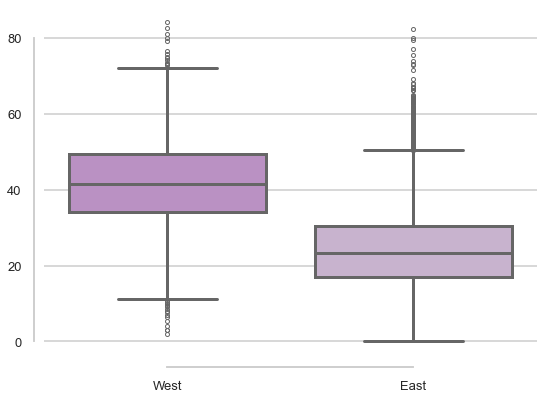

t-statistic: -71.315
p-value: 0.00000


In [19]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='lch_c',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure_puzzling/box_whisker_lch_c.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['a']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['a']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

# h (hue)

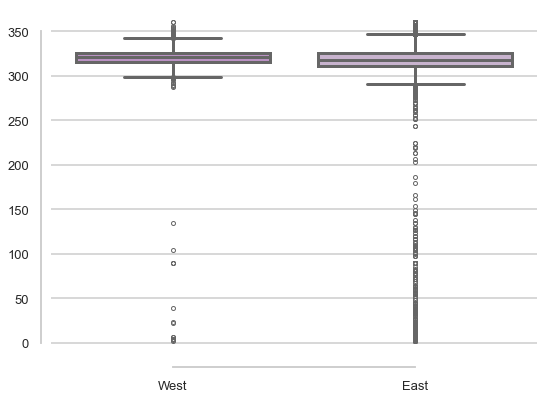

t-statistic: 51.440
p-value: 0.00000


In [20]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='lch_h',
    data=color_df_reduced,
    hue='region',
    legend=False,
    palette=[west_median_color, east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.savefig(f"../figures/figure_puzzling//box_whisker_lch_h.pdf", dpi=300, bbox_inches="tight")
plt.show()

# t-test as well
west_darkness = color_df_reduced[color_df_reduced['region'] == 'West']['b']
east_darkness = color_df_reduced[color_df_reduced['region'] == 'East']['b']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")